# Final Project

**Due date: 06-December-2024**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [45]:
library('tidyverse')
library('googlesheets4')
library('patchwork')
gs4_deauth()

### Visualization 1: Tibble of 2023 Heisman Finalists 2022 and 2023 Season Stats
#### The dataset used is from Sports-Reference.com and was extracted into a Googlesheets workbook. The data contains the collegiate career statistics of the 2023 Heisman Finalists'. Which was anaylzed for their last two season's statistics, 2022 and 2023. The following table is a summary of the arguably the most important factors to consider for the Heisman committee*. This table summarizes the average completion percentage, yards thrown, touchdown to interception ratio, and passer efficiency rating. The three finalists from this year were Jayden Daniels from LSU, Michael Penix Jr. from Washington, and Bo Nix from Oregon. These three athletes had very different collegiate careers. Daniels began his career at ASU before coming to LSU and leading the Tigers to an electric 2023 season Penix started at Indiana, where he was trending to become a Heisman nominee, battle through many injuries prior leading UW to the National Championship game. Lastly, Nix's career began at Auburn and continued to produce magic at Oregon, but fell short in big moments. The 2023 Heisman finalists, in order, were Daniels**, Penix, and Nix. It's very interesting to see how Nix seemingly beat Penix in every major category, but still fell short of the voting. This is due to the Pac-12 matchups from the 2023 season, where Nix lost all of them against Penix. Finally, Daniels vs Penix, it may seem as though Daniels was the clear cut winner. However, the other factors at play, that lead me to beleive Penix should have been the winner, is that Daniels did not lead LSU to a conference championship, major bowl game, and playoffs. The Heisman voting is very subjective as we can tell based off the stats and underlying factors.

###### *For quarterback nominees
###### **Heisman winner

In [46]:
qb = read_sheet('1MpZ2HwkamtEeGrVYZc1PBDfOpEbwee494e4dZjMc9Ng')
qb |>glimpse()

✔ Reading from ncaa_passing.

✔ Range penix_daniels_nix.



Rows: 16
Columns: 22
$ Season    <dbl> 2018, 2019, 2020, 2021, 2022, 2023, 2019, 2020, 2021, 2022, …
$ Name      <chr> "Penix", "Penix", "Penix", "Penix", "Penix", "Penix", "Danie…
$ Team      <chr> "Indiana", "Indiana", "Indiana", "Indiana", "Washington", "W…
$ Conf      <chr> "Big Ten", "Big Ten", "Big Ten", "Big Ten", "Pac-12", "Pac-1…
$ Class     <chr> "FR", "FR", "SO", "JR", "JR", "SR", "FR", "SO", "JR", "SR", …
$ Pos       <chr> "QB", "QB", "QB", "QB", "QB", "QB", "QB", "QB", "QB", "QB", …
$ G         <dbl> 3, 6, 6, 5, 13, 15, 12, 4, 13, 14, 12, 13, 11, 10, 13, 14
$ Cmp       <dbl> 21, 110, 124, 87, 362, 363, 205, 49, 197, 266, 236, 217, 214…
$ Att       <dbl> 34, 160, 220, 162, 554, 555, 338, 84, 301, 388, 327, 377, 35…
$ `Cmp%`    <dbl> 61.8, 68.8, 56.4, 53.7, 65.3, 65.4, 60.7, 58.3, 65.4, 68.6, …
$ Yds       <dbl> 219, 1394, 1645, 939, 4641, 4903, 2943, 701, 2380, 2913, 381…
$ TD        <dbl> 1, 10, 14, 4, 31, 36, 17, 5, 10, 17, 40, 16, 12, 11, 29, 45
$ `TD%`     <dbl> 2.9, 6.

In [47]:
qb |>
  filter(Season %in% c("2022", "2023")) |>
  group_by(Name) |>
  reframe(
    "Avg Comp%" = mean(`Cmp%`, na.rm = TRUE),
    "Avg Yards" = mean(Yds, na.rm = TRUE),
    "TD:Int" = round(sum(TD, na.rm = TRUE) / sum(Int, na.rm = TRUE), 2),
    "Avg Passer Rate" = mean(Rate, na.rm = TRUE)
  )

Name,Avg Comp%,Avg Yards,TD:Int,Avg Passer Rate
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Daniels,70.40,3362.5,8.14,176.25
Nix,74.65,4050.5,7.40,177.00
Penix,65.35,4772.0,3.53,154.20


### Visualization 2: Each Game From 2023 Season Stats : Penix vs. Daniels

#### This data was also from Sports-Reference.com and contains the total offensive stats of each quarterback from each game of the 2023 NCAA Football season. This analysis wanted to see how each quarterback performed in their Heisman finalist season. The graph is ordered from Week 1 of the season to the respective quarterback's final game. Daniel's ended his 2023 season with a conference matchup against Texas A&M where he had a passer efficiency rating of about 200 resulting in a victory. On the other hand, Penix ended his 2023 season in the National Championship game against a tough Michigan team where he had a passer efficiency rating of just under 100 resulting in a loss. With this visualization of passer efficiency rating, it's easy to see why the Heisman committee thought very highly of Daniels as he produced very consistently throughout his season. However, it makes me wonder about the other underlying factors for voting since Penix had to face a tougher schedule with more "high pressure" games. Alas, this analysis creates a strong visualization of how the Heisman voting committee views the production of quarterbacks hollistically.

In [48]:
gamelog = read_sheet('1MpZ2HwkamtEeGrVYZc1PBDfOpEbwee494e4dZjMc9Ng', sheet = 'penix_daniels_gamelog')

✔ Reading from ncaa_passing.

✔ Range ''penix_daniels_gamelog''.



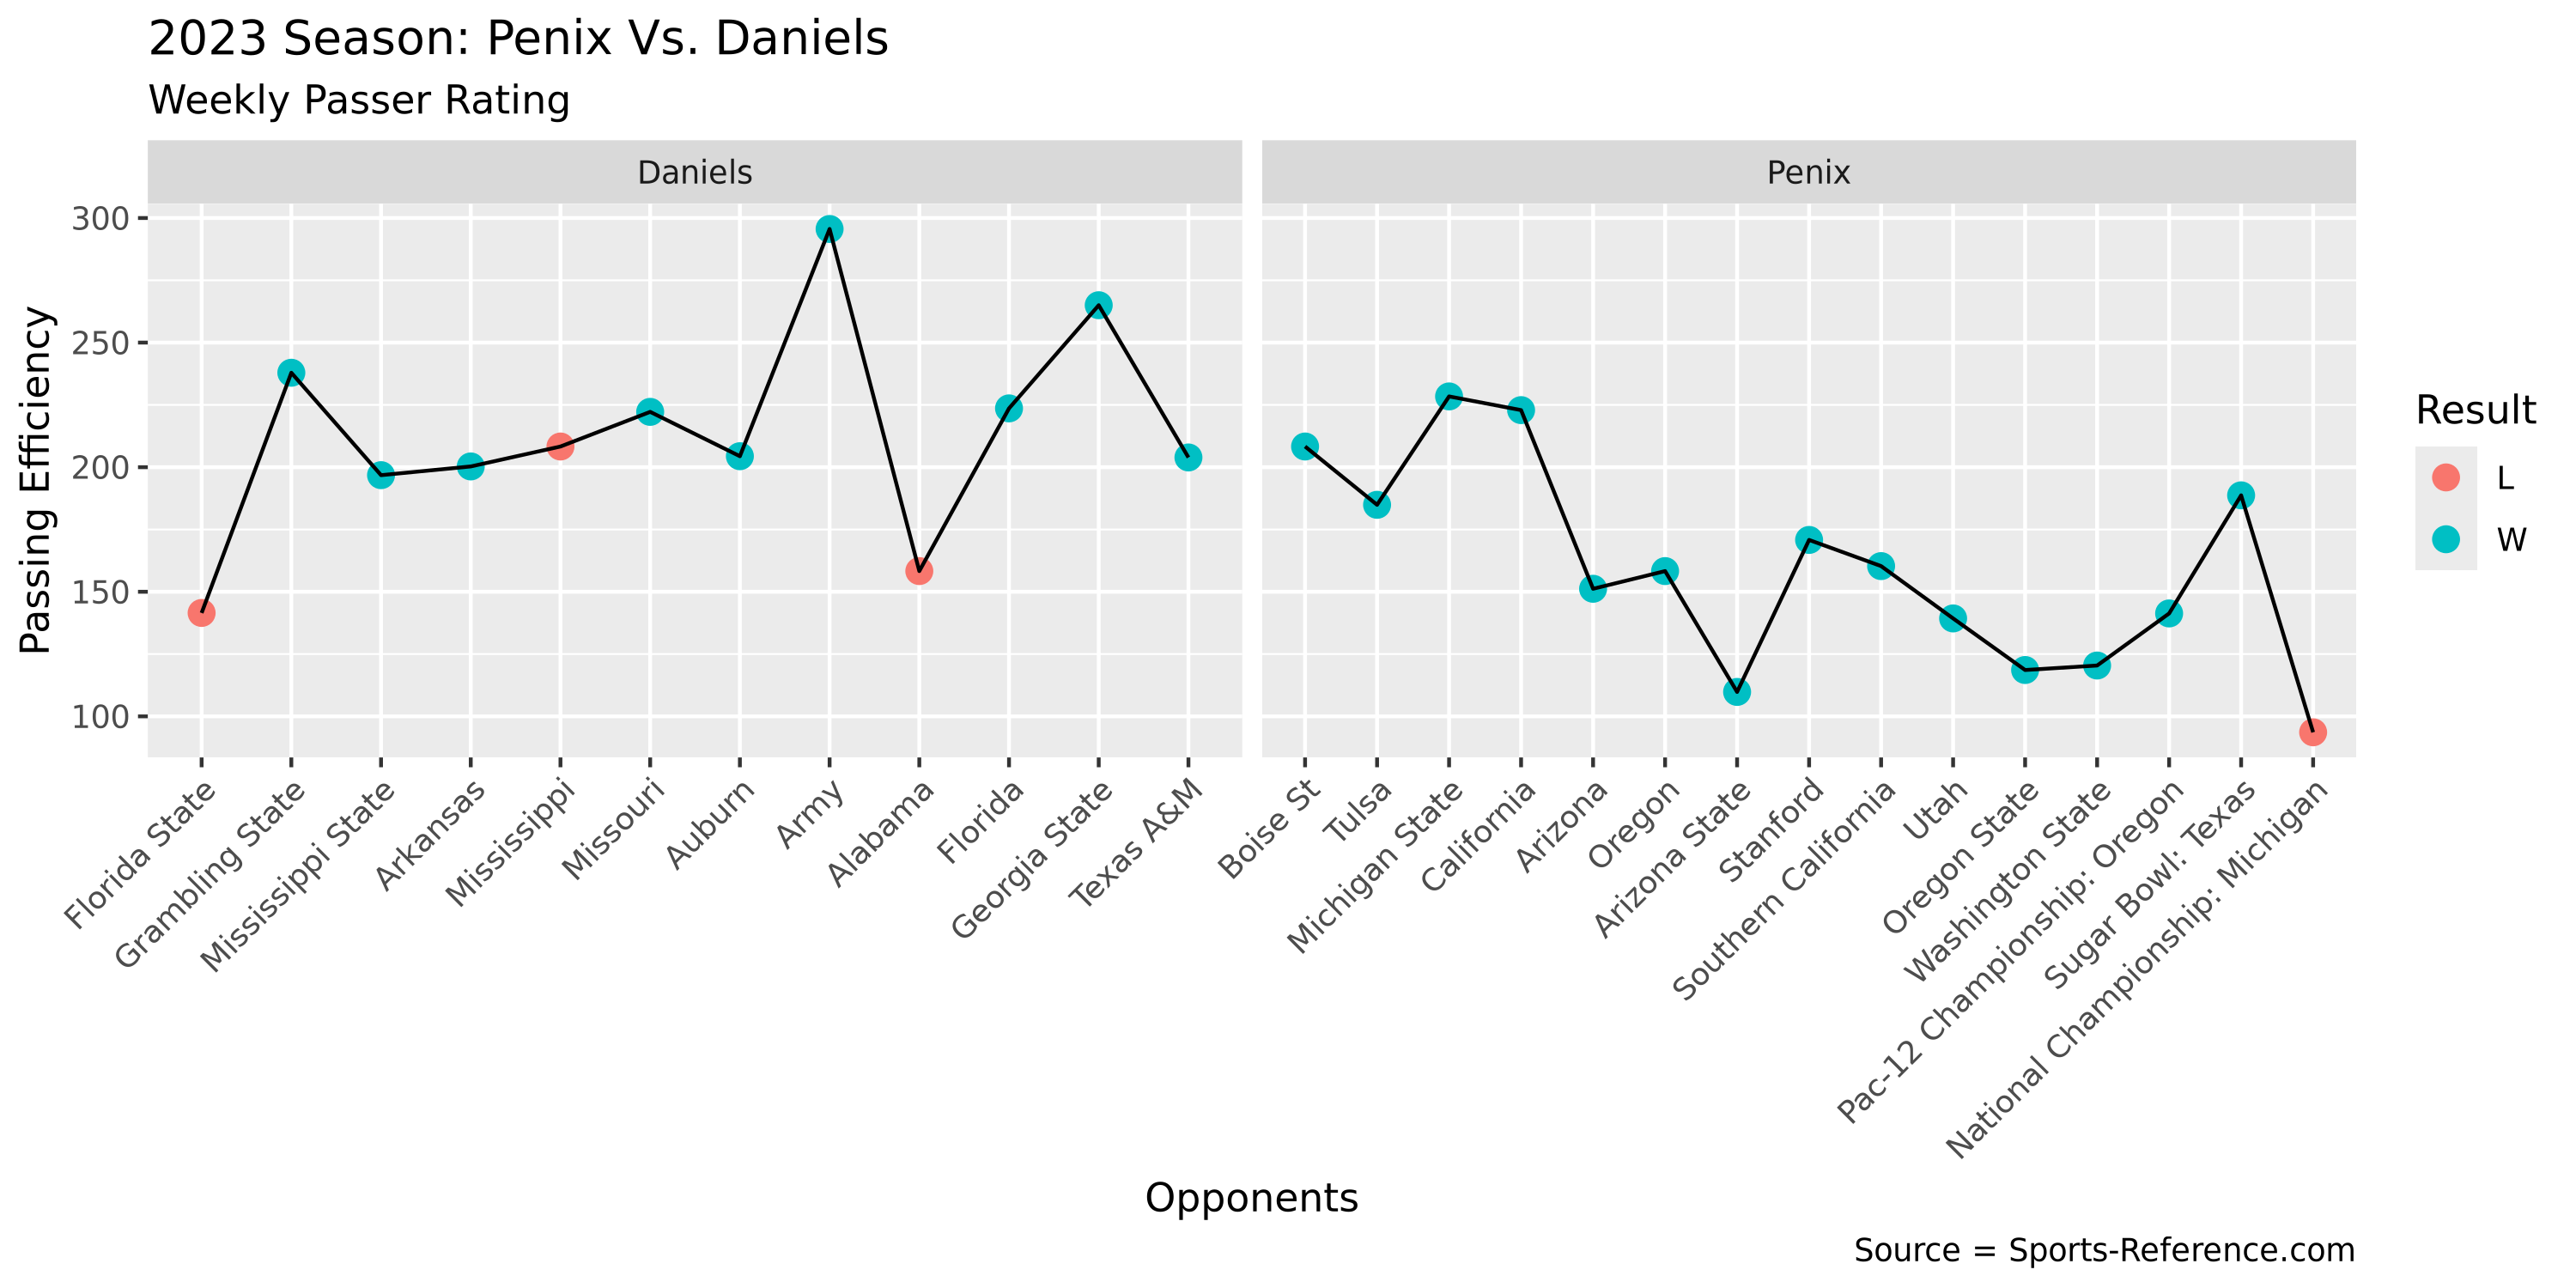

In [49]:
options(repr.plot.res=300, repr.plot.width=10, repr.plot.height = 5)
p = gamelog |>
    group_by(Name)|>
    mutate(wk_opp = fct_reorder(opp, week, .desc= FALSE))|>
    ggplot()+
        geom_point(aes(x=wk_opp,y=Rate, color=Result), size = 3)+
        geom_line(aes(x=wk_opp,y=Rate, group = Name))+
        facet_wrap(~Name, ncol=2, scales = "free_x")+
    labs(
        title = '2023 Season: Penix Vs. Daniels',
        subtitle = 'Weekly Passer Rating',
        caption = 'Source = Sports-Reference.com',
        x= 'Opponents',
        y= 'Passing Efficiency'
    ) +
    theme(
        axis.text.x = element_text(angle = 45, hjust = 1))
p

### Visualization 3: Past 10 Heisman Quarterback Winners Total Yards From Heisman Year

#### This dataset also comes from Sports-Reference.com and aims to compare Jayden Daniels with the last 10 quarterbacks who also won the Heisman. In my opinion, one of the most important factors for this race is total yards produced as this is a stronger indicator of how well you are moving the ball down the field and leading your team to victories. I had to remove two Heismans winners from this dataset as they were not playing the quarterback position. This graph shows total yards produced by each quarterback in order from the highest to the lowest. Additionally, this graph highlights the most recent winner with a red highlight around Daniel's bar. Interestingly, the spread of winners across conferences is fairly even, with SEC pulling two additional winners from the rest. Also, this graph shows the disparity of yards produced from the last 10 quarterback winners. It may seeem that from a total yard perspective, that the winners throw around 4000 yards on average, with anomalies on either end of the spectrum. So, with all of this to say, Daniels' ranks around 7th among the last 10 quarterback winners of the Heisman.

In [50]:
heisman = read_sheet('1MpZ2HwkamtEeGrVYZc1PBDfOpEbwee494e4dZjMc9Ng', sheet = '10yr_heisman')
heisman

✔ Reading from ncaa_passing.

✔ Range ''10yr_heisman''.



Season,Name,Team,Conf,Class,Pos,G,Cmp,Att,Cmp%,⋯,TD%,Int,Int%,Y/A,AY/A,Y/C,Y/G,Rate,Awards,Bowl_Game
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2012,Manziel,Texas A&M,SEC,FR,QB,13,295,434,68.0,⋯,6.0,9,2.1,8.5,8.80,12.6,285.1,155.3,H-1AA,NA
2013,Winston,Florida State,ACC,FR,QB,14,257,384,66.9,⋯,10.4,10,2.6,10.6,11.48,15.8,289.8,184.8,H-1AACamp,NA
2014,Mariota,Oregon,Pac-12,JR,QB,15,304,445,68.3,⋯,9.4,4,0.9,10.0,11.49,14.7,296.9,181.7,H-1MaxwellAACamp,NA
2016,Jackson,Louisville,ACC,SO,QB,13,230,409,56.2,⋯,7.3,9,2.2,8.7,9.14,15.4,272.5,148.8,H-1MaxwellAACamp,NA
2017,Mayfield,Oklahoma,Big 12,SR,QB,14,285,404,70.5,⋯,10.6,6,1.5,11.5,12.91,16.2,330.5,198.9,H-1MaxwellAACamp,NA
2018,Murray,Oklahoma,Big 12,JR,QB,14,260,377,69.0,⋯,11.1,7,1.9,11.6,12.96,16.8,311.5,199.2,H-1,NA
2019,Burrow,LSU,SEC,SR,QB,15,402,527,76.3,⋯,11.4,6,1.1,10.8,12.53,14.1,378.1,202.0,H-1MaxwellAACamp,NA
2021,Young,Alabama,SEC,SO,QB,15,366,547,66.9,⋯,8.6,7,1.3,8.9,10.05,13.3,324.8,167.5,H-1MaxwellAA,NA
2022,Williams,USC,Pac-12,SO,QB,14,333,500,66.6,⋯,8.4,5,1.0,9.1,10.30,13.6,324.1,168.5,H-1MaxwellAACamp,NA


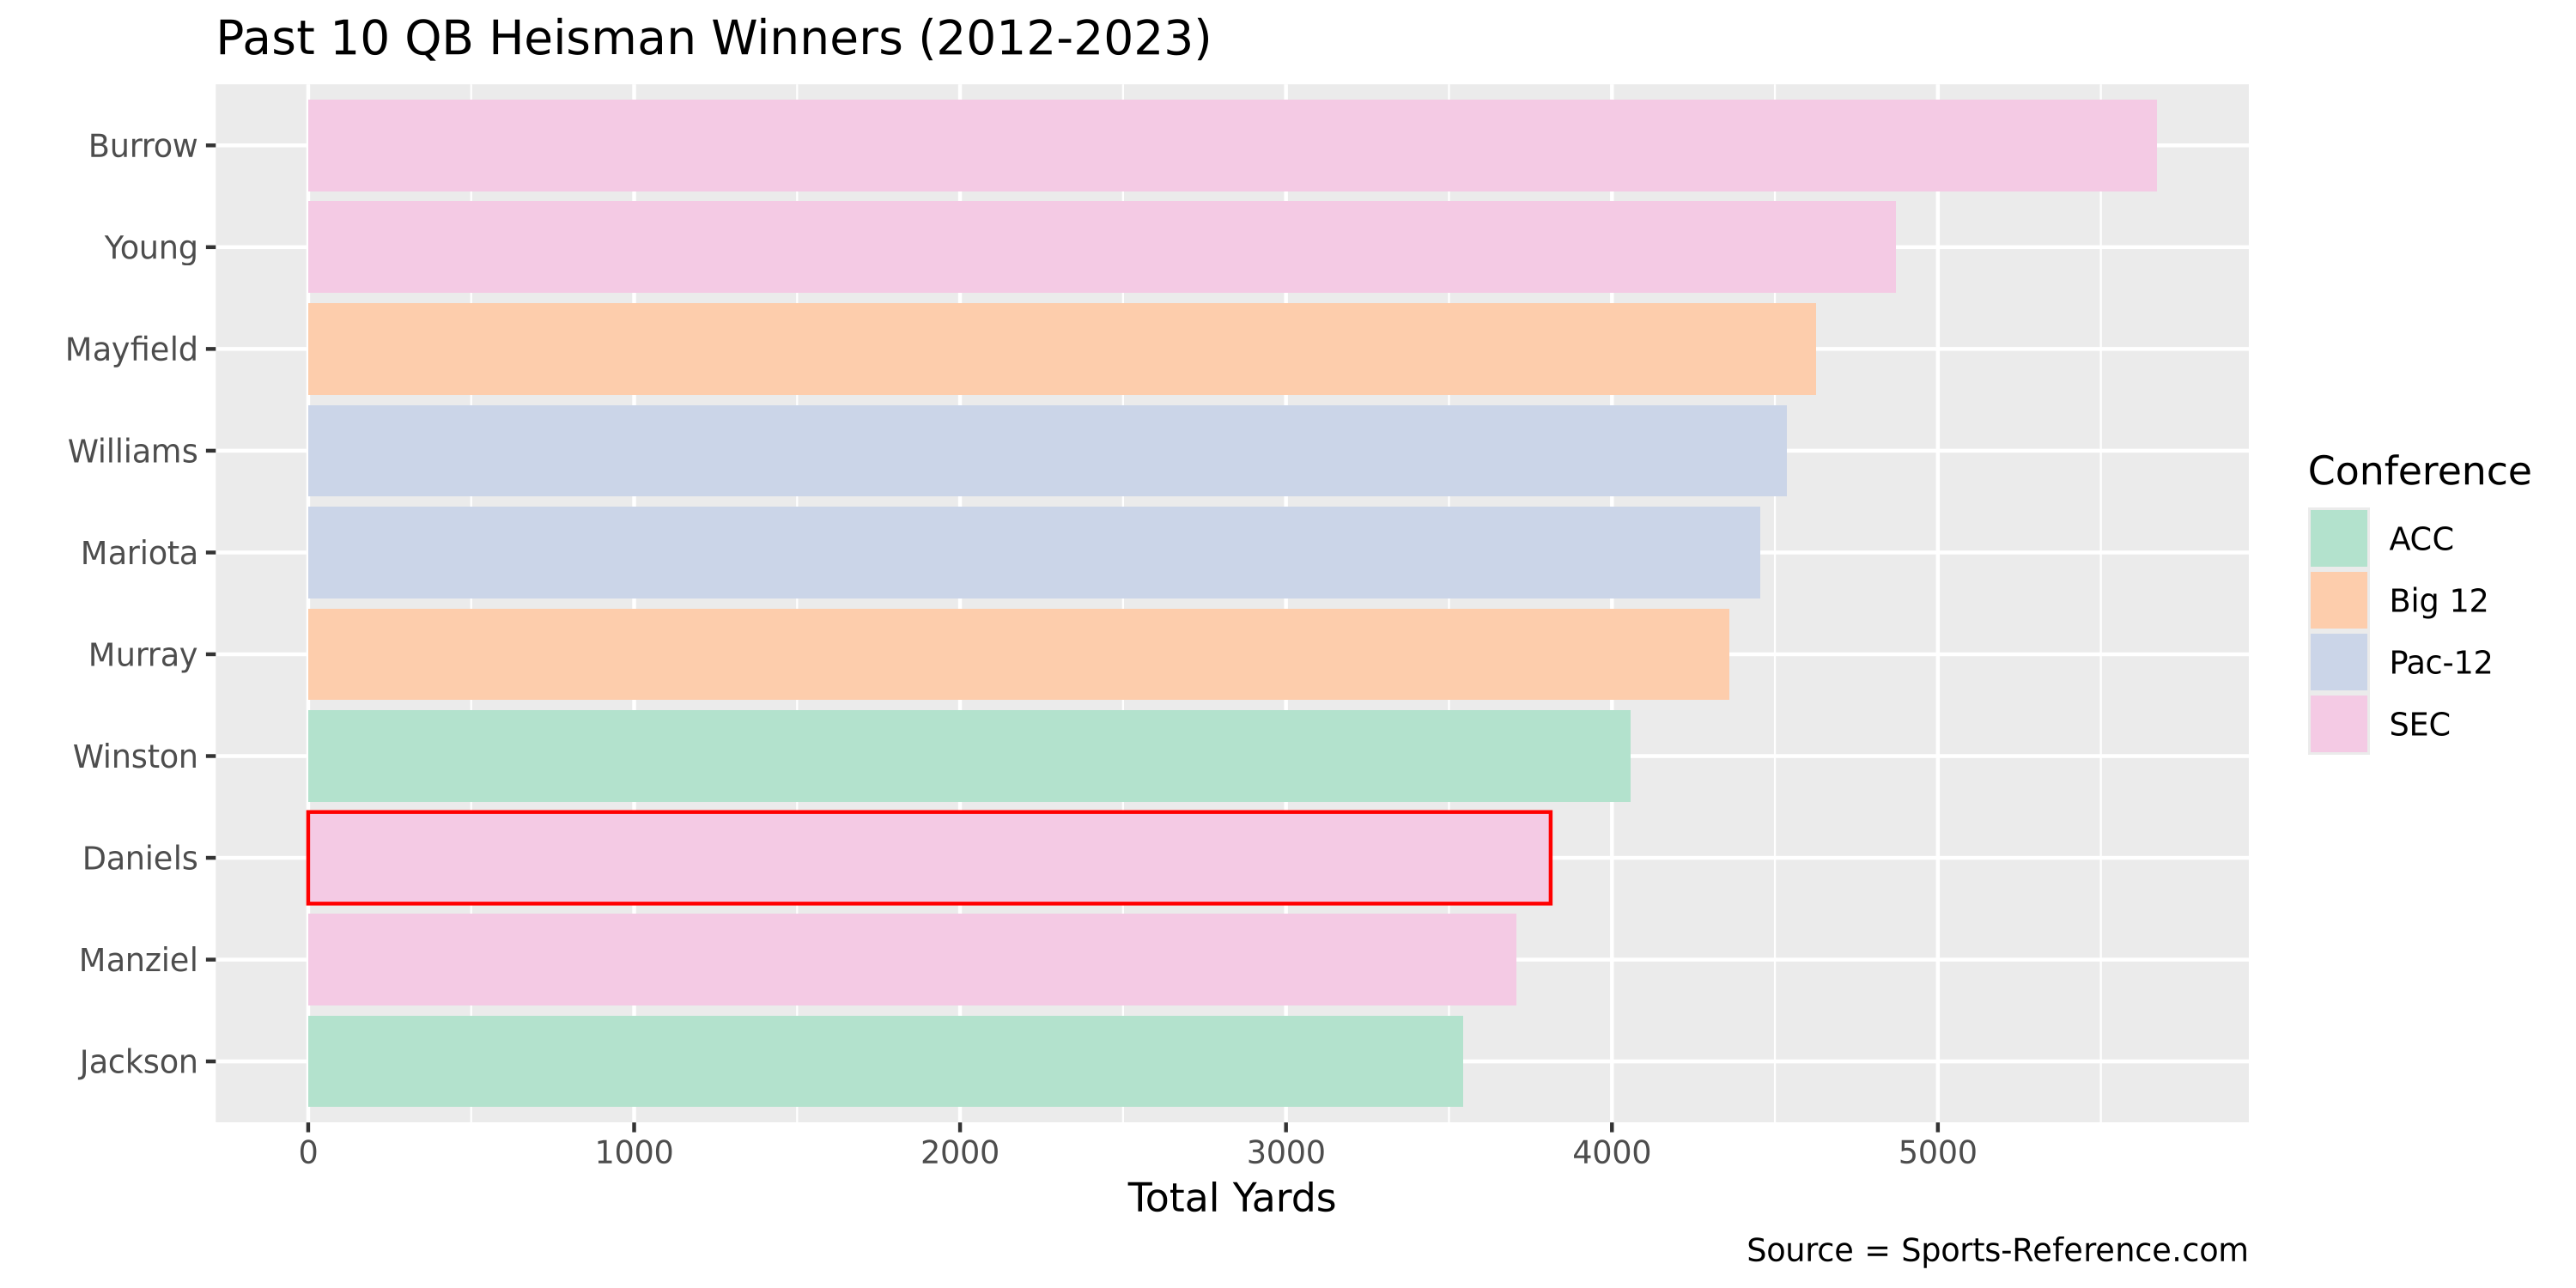

In [51]:
options(repr.plot.res=300, repr.plot.width =10, repr.plot.height=5)
df =  heisman |> 
    mutate(winner = fct_reorder(Name, Yds, max))|>
    mutate(rate = fct_reorder(Name, Rate, max))
    ggplot(df, aes(x=Yds, y=winner, fill=Conf)) +
        geom_col() +
        geom_col(color='red', data = df |> filter(rate=='Daniels'), show.legend=FALSE) +
    labs(
        title="Past 10 QB Heisman Winners (2012-2023)",
        caption = 'Source = Sports-Reference.com',
        y= '', 
        x='Total Yards',
        fill ='Conference'
    ) +
        scale_fill_brewer(palette='Pastel2')+
    scale_x_continuous(n.breaks = 6)

# Thank you!!
#### This has been an awesome learning experience and I am really excited to continue building on these skills in my future classes and career. I'll continue to tinker around with Anaconda and hope to become a prolific researcher and coders in the coming years.